In [9]:
import os
import dask
import ast
import json
from dask import delayed, compute
import io
from dask.distributed import LocalCluster
from dask import delayed
import dask.array as da
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import dask.dataframe as dd
from dask.distributed import Client
import dask.bag as db
from nltk.corpus import stopwords
from nltk import word_tokenize
import nltk
import dask.dataframe as ddf
from sklearn.datasets import fetch_20newsgroups
from dask.distributed import Client
import time
import numpy as np
import dask.bag as db
import dask.dataframe as ddf
import json
import csv
import os
import string
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
nltk.download('stopwords')
import dask
import dask.array as da
from operator import add
import dask.bag as db
import re
import pprint

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from dask.distributed import Client, SSHCluster

machine1 = '10.67.22.152'
machine2 = '10.67.22.250'

In [3]:
def load_papers(filename):
    
    with open(os.path.join(folder_path, filename), 'r') as file:
        json_data = json.load(file)
        
    return json_data

def mk_str(paper):
    translator = str.maketrans('', '', string.punctuation)
    trans_texts = [paper['body_text'][i]['text'].translate(translator) for i in range(len(paper['body_text']))]
    string_texts = ''.join(trans_texts)
    return list(string_texts.split())


In [4]:
folder_path =  '/mnt/covid/data/papers1'
file_list = os.listdir(folder_path)

# Define the additional words to omit
omit_words = ['et', 'al', 'also', 'may', 'fig', 'der', 'p', 'h', 'using', 'used', 'ma', 'de', 'however' , 'one' , 'two']

# Remove stopwords, additional words, and numbers from the word list
stopwords_list = stopwords.words('english')

word_list = db.from_sequence(file_list).map(load_papers).map(mk_str)

In [5]:
npartitions = [1 ,2,  4 , 8 , 16,  32 , 64 , 128, 256]

In [6]:
nworkers = [1 , 2 , 4 , 8 , 14]

In [7]:
def time_task1(npartitions):
    
    i = time.time()
    
    result = (
     word_list.repartition(npartitions)
    .flatten().map(lambda word: word.lower())
    .filter(lambda word: word not in stopwords_list and word not in omit_words and word.isalpha())
    .foldby(lambda x: x, lambda x , _ : x + 1, initial= 0 , combine = add)
    .to_dataframe(columns=['Word', 'Count'])
    ).compute()
    
    f = time.time()
    
    return (f-i)

In [11]:
durations = np.full((len(npartitions) , len(nworkers)) , np.nan)  # Initialize an empty matrix
for i , n in enumerate(nworkers):

    cluster = SSHCluster([machine1, machine1, machine2],
                         scheduler_options={"port": 0, "dashboard_address": ":9999"},
                         worker_options={"n_workers": n})

    client = Client(cluster)

    for j , nps in enumerate(npartitions):
        duration = time_task1(nps)
        durations[j][i] = duration 
        print('For', nps, 'number of partitions and', n * 2 , 'number of workers, the runtime is:', duration, 'seconds')

    client.close()
    cluster.close()
    client.shutdown()


2023-07-07 11:19:07,147 - distributed.deploy.ssh - INFO - 2023-07-07 11:19:07,146 - distributed.http.proxy - INFO - To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
2023-07-07 11:19:07,206 - distributed.deploy.ssh - INFO - 2023-07-07 11:19:07,205 - distributed.scheduler - INFO - State start
2023-07-07 11:19:07,213 - distributed.deploy.ssh - INFO - 2023-07-07 11:19:07,212 - distributed.scheduler - INFO -   Scheduler at:  tcp://10.67.22.152:33151
2023-07-07 11:19:08,598 - distributed.deploy.ssh - INFO - 2023-07-07 11:19:08,596 - distributed.nanny - INFO -         Start Nanny at: 'tcp://10.67.22.152:39069'
2023-07-07 11:19:09,184 - distributed.deploy.ssh - INFO - 2023-07-07 11:19:09,179 - distributed.nanny - INFO -         Start Nanny at: 'tcp://10.67.22.250:36557'
2023-07-07 11:19:09,336 - distributed.deploy.ssh - INFO - 2023-07-07 11:19:09,334 - distributed.worker - INFO -       Start worker at:   tcp://10.67.22.1

For 1 number of partitions and 2 number of workers, the runtime is: 49.736236333847046 seconds
For 2 number of partitions and 2 number of workers, the runtime is: 53.15137815475464 seconds
For 4 number of partitions and 2 number of workers, the runtime is: 54.423195362091064 seconds
For 8 number of partitions and 2 number of workers, the runtime is: 61.3484787940979 seconds
For 16 number of partitions and 2 number of workers, the runtime is: 79.09959936141968 seconds
For 32 number of partitions and 2 number of workers, the runtime is: 69.93460416793823 seconds
For 64 number of partitions and 2 number of workers, the runtime is: 65.21283984184265 seconds
For 128 number of partitions and 2 number of workers, the runtime is: 81.03236484527588 seconds
For 256 number of partitions and 2 number of workers, the runtime is: 79.68942999839783 seconds


2023-07-07 11:29:06,186 - distributed.deploy.ssh - INFO - 2023-07-07 11:29:06,184 - distributed.http.proxy - INFO - To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
2023-07-07 11:29:06,239 - distributed.deploy.ssh - INFO - 2023-07-07 11:29:06,238 - distributed.scheduler - INFO - State start
2023-07-07 11:29:06,245 - distributed.deploy.ssh - INFO - 2023-07-07 11:29:06,244 - distributed.scheduler - INFO -   Scheduler at:  tcp://10.67.22.152:34047
2023-07-07 11:29:07,551 - distributed.deploy.ssh - INFO - 2023-07-07 11:29:07,550 - distributed.nanny - INFO -         Start Nanny at: 'tcp://10.67.22.152:45275'
2023-07-07 11:29:07,556 - distributed.deploy.ssh - INFO - 2023-07-07 11:29:07,555 - distributed.nanny - INFO -         Start Nanny at: 'tcp://10.67.22.152:38377'
2023-07-07 11:29:08,199 - distributed.deploy.ssh - INFO - 2023-07-07 11:29:08,196 - distributed.worker - INFO -       Start worker at:   tcp://10.67.22.1

For 1 number of partitions and 4 number of workers, the runtime is: 42.056904792785645 seconds
For 2 number of partitions and 4 number of workers, the runtime is: 45.44763898849487 seconds
For 4 number of partitions and 4 number of workers, the runtime is: 29.20280623435974 seconds
For 8 number of partitions and 4 number of workers, the runtime is: 30.598917245864868 seconds
For 16 number of partitions and 4 number of workers, the runtime is: 55.42852592468262 seconds
For 32 number of partitions and 4 number of workers, the runtime is: 47.66043972969055 seconds
For 64 number of partitions and 4 number of workers, the runtime is: 56.717633962631226 seconds
For 128 number of partitions and 4 number of workers, the runtime is: 77.25376653671265 seconds
For 256 number of partitions and 4 number of workers, the runtime is: 61.87939524650574 seconds


2023-07-07 11:36:37,563 - distributed.deploy.ssh - INFO - 2023-07-07 11:36:37,562 - distributed.http.proxy - INFO - To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
2023-07-07 11:36:37,621 - distributed.deploy.ssh - INFO - 2023-07-07 11:36:37,620 - distributed.scheduler - INFO - State start
2023-07-07 11:36:37,627 - distributed.deploy.ssh - INFO - 2023-07-07 11:36:37,626 - distributed.scheduler - INFO -   Scheduler at:  tcp://10.67.22.152:40009
2023-07-07 11:36:38,975 - distributed.deploy.ssh - INFO - 2023-07-07 11:36:38,974 - distributed.nanny - INFO -         Start Nanny at: 'tcp://10.67.22.152:34211'
2023-07-07 11:36:38,979 - distributed.deploy.ssh - INFO - 2023-07-07 11:36:38,978 - distributed.nanny - INFO -         Start Nanny at: 'tcp://10.67.22.152:45211'
2023-07-07 11:36:38,987 - distributed.deploy.ssh - INFO - 2023-07-07 11:36:38,985 - distributed.nanny - INFO -         Start Nanny at: 'tcp://10.67.22.15

For 1 number of partitions and 8 number of workers, the runtime is: 40.992796182632446 seconds
For 2 number of partitions and 8 number of workers, the runtime is: 43.85797071456909 seconds
For 4 number of partitions and 8 number of workers, the runtime is: 25.25538730621338 seconds
For 8 number of partitions and 8 number of workers, the runtime is: 19.582359313964844 seconds
For 16 number of partitions and 8 number of workers, the runtime is: 39.324344635009766 seconds
For 32 number of partitions and 8 number of workers, the runtime is: 35.60706090927124 seconds
For 64 number of partitions and 8 number of workers, the runtime is: 39.78314161300659 seconds
For 128 number of partitions and 8 number of workers, the runtime is: 61.37386727333069 seconds
For 256 number of partitions and 8 number of workers, the runtime is: 50.11048865318298 seconds


2023-07-07 11:42:38,785 - distributed.deploy.ssh - INFO - 2023-07-07 11:42:38,784 - distributed.http.proxy - INFO - To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
2023-07-07 11:42:38,846 - distributed.deploy.ssh - INFO - 2023-07-07 11:42:38,845 - distributed.scheduler - INFO - State start
2023-07-07 11:42:38,854 - distributed.deploy.ssh - INFO - 2023-07-07 11:42:38,853 - distributed.scheduler - INFO -   Scheduler at:  tcp://10.67.22.152:42991
2023-07-07 11:42:40,179 - distributed.deploy.ssh - INFO - 2023-07-07 11:42:40,177 - distributed.nanny - INFO -         Start Nanny at: 'tcp://10.67.22.152:44365'
2023-07-07 11:42:40,184 - distributed.deploy.ssh - INFO - 2023-07-07 11:42:40,183 - distributed.nanny - INFO -         Start Nanny at: 'tcp://10.67.22.152:41323'
2023-07-07 11:42:40,187 - distributed.deploy.ssh - INFO - 2023-07-07 11:42:40,187 - distributed.nanny - INFO -         Start Nanny at: 'tcp://10.67.22.15

For 1 number of partitions and 16 number of workers, the runtime is: 42.65348839759827 seconds
For 2 number of partitions and 16 number of workers, the runtime is: 45.22102689743042 seconds
For 4 number of partitions and 16 number of workers, the runtime is: 24.035716772079468 seconds
For 8 number of partitions and 16 number of workers, the runtime is: 18.91120171546936 seconds
For 16 number of partitions and 16 number of workers, the runtime is: 38.763890743255615 seconds
For 32 number of partitions and 16 number of workers, the runtime is: 29.95734477043152 seconds
For 64 number of partitions and 16 number of workers, the runtime is: 31.085803508758545 seconds
For 128 number of partitions and 16 number of workers, the runtime is: 56.25736856460571 seconds
For 256 number of partitions and 16 number of workers, the runtime is: 48.11815333366394 seconds


2023-07-07 11:48:20,858 - distributed.deploy.ssh - INFO - 2023-07-07 11:48:20,857 - distributed.http.proxy - INFO - To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
2023-07-07 11:48:20,915 - distributed.deploy.ssh - INFO - 2023-07-07 11:48:20,914 - distributed.scheduler - INFO - State start
2023-07-07 11:48:20,921 - distributed.deploy.ssh - INFO - 2023-07-07 11:48:20,920 - distributed.scheduler - INFO -   Scheduler at:  tcp://10.67.22.152:43255
2023-07-07 11:48:22,405 - distributed.deploy.ssh - INFO - 2023-07-07 11:48:22,409 - distributed.nanny - INFO -         Start Nanny at: 'tcp://10.67.22.250:36473'
2023-07-07 11:48:22,409 - distributed.deploy.ssh - INFO - 2023-07-07 11:48:22,413 - distributed.nanny - INFO -         Start Nanny at: 'tcp://10.67.22.250:37697'
2023-07-07 11:48:22,413 - distributed.deploy.ssh - INFO - 2023-07-07 11:48:22,417 - distributed.nanny - INFO -         Start Nanny at: 'tcp://10.67.22.25

For 1 number of partitions and 28 number of workers, the runtime is: 43.57418489456177 seconds
For 2 number of partitions and 28 number of workers, the runtime is: 45.78841686248779 seconds
For 4 number of partitions and 28 number of workers, the runtime is: 25.946930170059204 seconds
For 8 number of partitions and 28 number of workers, the runtime is: 22.547829389572144 seconds
For 16 number of partitions and 28 number of workers, the runtime is: 42.02545356750488 seconds
For 32 number of partitions and 28 number of workers, the runtime is: 32.917662143707275 seconds
For 64 number of partitions and 28 number of workers, the runtime is: 32.2302451133728 seconds
For 128 number of partitions and 28 number of workers, the runtime is: 59.0307936668396 seconds
For 256 number of partitions and 28 number of workers, the runtime is: 47.384870529174805 seconds


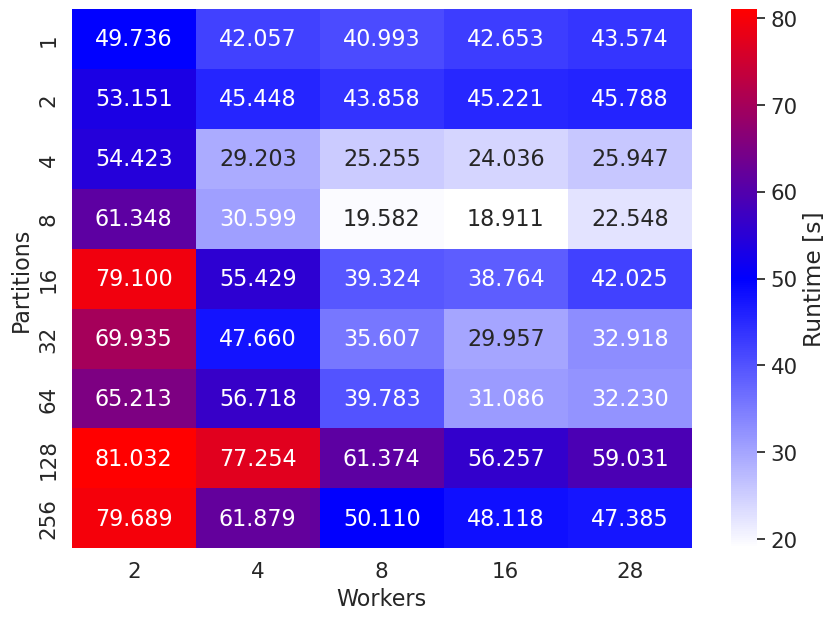

In [12]:
reshaped_durations = np.array(durations).reshape(len(npartitions), len(nworkers))
df_cm = pd.DataFrame(reshaped_durations, index=npartitions, columns=np.array(nworkers)*2)


# Plot the heatmap
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4)  # for label size

# Define the custom color map from white to blue and then red
colors = ["white", "blue", "red"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt=".3f",
            cbar_kws={'label': 'Runtime [s]'}, cmap=cmap)
plt.xlabel('Workers', fontsize=16)
plt.ylabel('Partitions', fontsize=16)
plt.show()
plt.style.use('default')

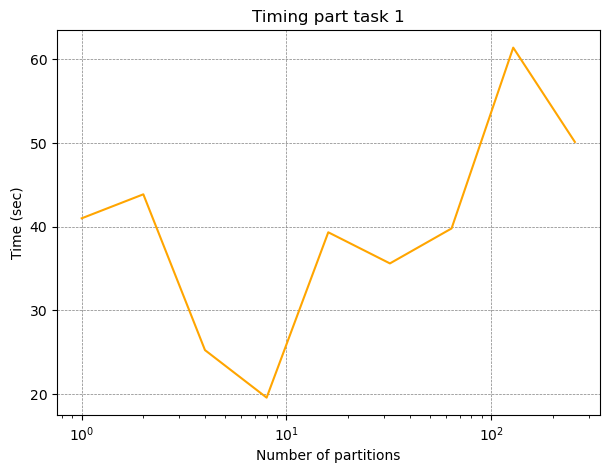

In [14]:
plt.figure(figsize=(7,5))
plt.plot(npartitions,reshaped_durations[:,2],c='orange')
plt.xscale('log')
plt.xlabel('Number of partitions')
plt.ylabel('Time (sec)')
plt.title('Timing part task 1')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

In [15]:
client.close()
cluster.close()
client.shutdown()